In [5]:
#導入需要的依賴包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# #統計預測圖
seaborn.relplot() 是一個非常好用的繪圖指令, 可以一次把數個變數的關係呈現在一張圖表上.

`load_dataset` looks for online csv files on https://github.com/mwaskom/seaborn-data. Here's the docstring:<br>

Load a dataset from the online repository (requires internet).<br>

>Parameters

>name : str Name of the dataset (name.csv on https://github.com/mwaskom/seaborn-data). You can obtain list of available datasets using func:get_dataset_names<br>
kws : dict, optional Passed to pandas.read_csv


In [11]:
#加載sns內置數據集(線上)
tips=sns.load_dataset("tips")
sns.set(color_codes=True)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



內建數據集-tips數據集 
> 關於數據集，total_bill是消費總金額，tip是小費，size指用餐人數。

# #單變量分析繪圖（直方圖、條形圖）
> Dataset: NBA_season1718_salary.csv<br>
ref:https://www.kaggle.com/koki25ando/salary

In [3]:
dataset=pd.read_csv("NBA_season1718_salary.csv")
dataset

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0
...,...,...,...,...
568,569,Quinn Cook,NOP,25000.0
569,570,Chris Johnson,HOU,25000.0
570,571,Beno Udrih,DET,25000.0
571,572,Joel Bolomboy,MIL,22248.0


In [4]:
#對讀進來的數據按薪資降序排序並取前10條數據
salary_top10=dataset.sort_values("season17_18",ascending=False).head(10)
salary_top10

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0
5,6,Kyle Lowry,TOR,28703704.0
6,7,Russell Westbrook,OKC,28530608.0
7,8,Mike Conley,MEM,28530608.0
8,9,James Harden,HOU,28299399.0
9,10,DeMar DeRozan,TOR,27739975.0


In [5]:
#取出球員列數據，作為條形圖橫坐標
player=salary_top10["Player"]

#取出球員薪資列，作為條形圖縱坐標
salary=salary_top10["season17_18"]


<AxesSubplot:xlabel='Player', ylabel='season17_18'>

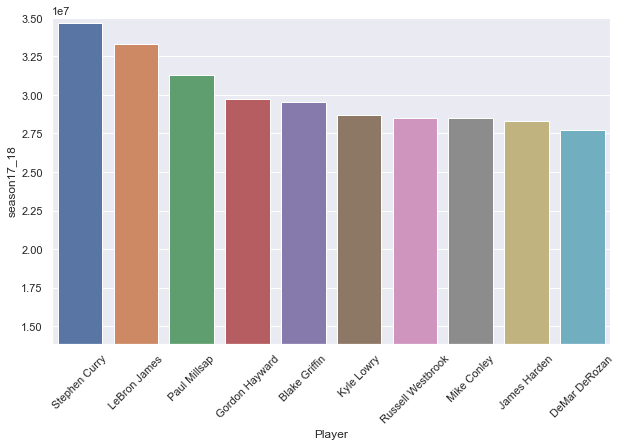

In [28]:
plt.figure(figsize=(10,6)) #設定圖表的寬與高
plt.xticks(rotation=45) #設定x軸刻度的方向
plt.ylim(salary.min()*0.5,salary.max()*1.01)
#ci參數表示允許的誤差範圍（控制誤差棒的百分比，在0-100之間）
sns.barplot(x=player,y=salary,data=salary_top10,ci=68)


## Result

從條形圖中不難看出，勇士隊的當家球星curry資最高，將近達到3500萬美元，位居第二的是勒布朗詹姆斯，也是在3300萬美元以上。上面的條形圖是按球員作為橫坐標，下面我們按球隊匯總，看看哪個球隊的薪資總額最高。

# 練習 - 彙總球隊薪資繪製成直方圖
按球隊匯總，看看哪個球隊的薪資總額最高。

In [32]:
salary_by_team=dataset.groupby("Tm",as_index=False)["season17_18"].sum()
salary_by_team

,Tm,season17_18
0,ATL,100217797.0
1,BOS,115009962.0
2,BRK,96039772.0
3,CHI,89425042.0
4,CHO,117228164.0
5,CLE,137288549.0
6,DAL,85821361.0
7,DEN,107889099.0
8,DET,120086105.0
9,GSW,137494845.0


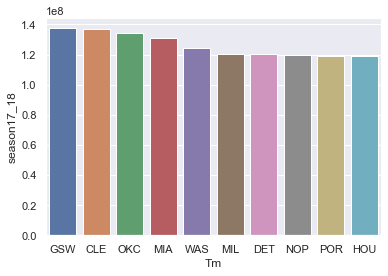

In [39]:
#先將資料集用groupby根據球隊分別匯總
salary_by_team=salary_by_team.sort_values("season17_18",ascending=False)

tm_top10=salary_by_team[:10]

sns.barplot("Tm","season17_18",data=tm_top10)
sns.color_palette("hls",10)
sns.set(style="whitegrid")

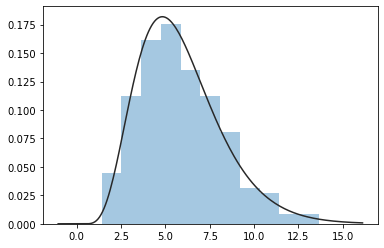

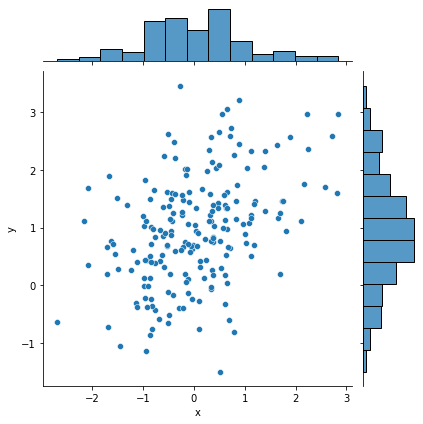

In [9]:
import scipy.stats as stats
x=np.random.gamma(6,size=200)
sns.distplot(x,kde=False,fit=stats.gamma)
mean,cov=[0,1],[(1,0.5),(0.5,1)]
data=np.random.multivariate_normal(mean,cov,200)
df=pd.DataFrame(data,columns=["x","y"])
sns.jointplot(x="x",y="y",data=df)

# #seaborn回歸分析繪圖（regplot）

In [14]:
#導入依賴包 
%matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
#加載sns內置數據集 

 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


內建數據集-tips數據集 
> 關於數據集，total_bill是消費總金額，tip是小費，size指用餐人數。

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

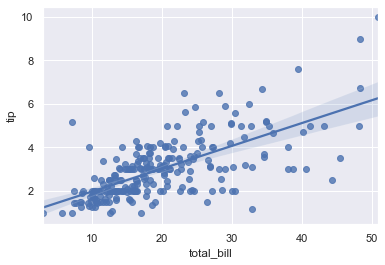

# [練習]看看其他變量和小費之間的關係。


In [ ]:
sns.distplot(tips["total_bill"])
sns.distplot(tips["tip"])

<AxesSubplot:xlabel='size', ylabel='tip'>

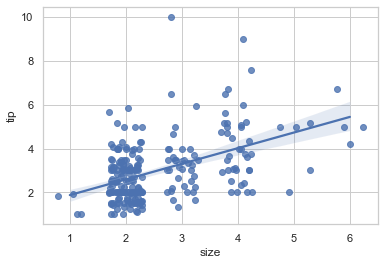

In [19]:
#導入依賴包 %matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style="whitegrid", color_codes=True) 
tips = sns.load_dataset("tips")


<AxesSubplot:xlabel='tip', ylabel='Density'>

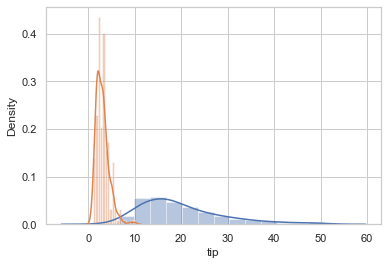

# #散點圖（分布散點、分簇散點圖）

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

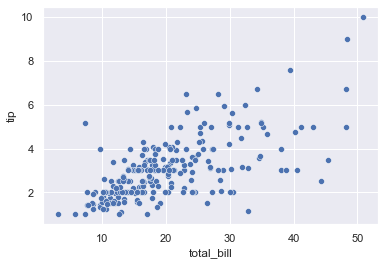

In [12]:
sns.scatterplot(x="total_bill",y="tip",data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

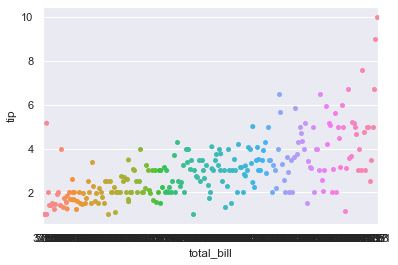

In [13]:
sns.stripplot(x="total_bill",y="tip",data=tips)

從上面的圖中可以看到，stripplot參數中的x是橫軸數據（分類數據），y是縱軸數據（類型對應數據），由於我們將總金額作為分類，導致分類太多，橫軸數據根本看不清，所以我們重新傳參，分別看下性別和小費、時間和小費，用餐日期跟小費之間的數據分布。

<AxesSubplot:xlabel='sex', ylabel='tip'>

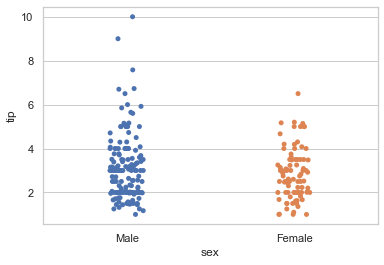

In [26]:
sns.stripplot(x="sex",y="tip",data=tips)

<AxesSubplot:xlabel='day', ylabel='tip'>

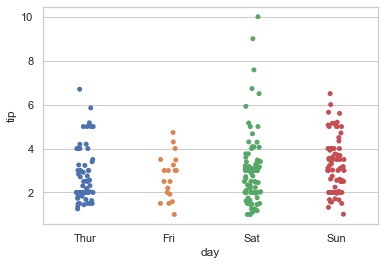

In [27]:
sns.stripplot(x="day",y="tip",data=tips)

<AxesSubplot:xlabel='time', ylabel='tip'>

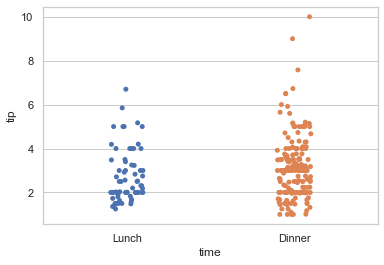

In [28]:
sns.stripplot(x="time",y="tip",data=tips)

<AxesSubplot:xlabel='smoker', ylabel='tip'>

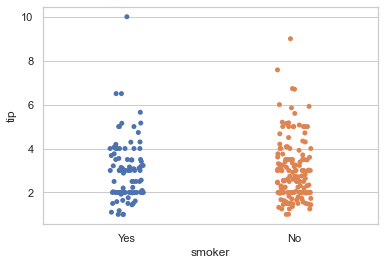

In [29]:
sns.stripplot(x="smoker",y="tip",data=tips)

因為jitter（數據抖動）這個參數的默認值是True,如果我們將其設置為False，效果如圖：


<AxesSubplot:xlabel='day', ylabel='tip'>

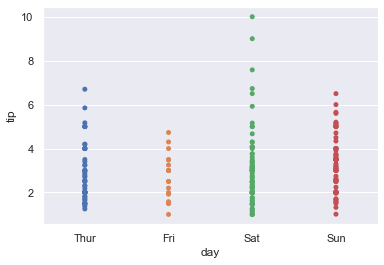

In [15]:
sns.stripplot(x="day",y="tip",jitter=False,data=tips)

<AxesSubplot:xlabel='day', ylabel='tip'>

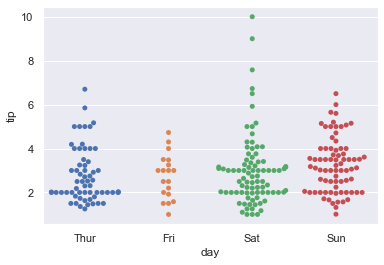

In [16]:
sns.swarmplot(x="day",y="tip",data=tips)

在stripplot函數中，我們只看了某一類別對應的數據，而沒有看類中對應其他類的數據分布，舉個例子，比如我們用stripplot看到男性和女性對應的小費數據，但是不知道男性和女性對應的數據中哪些是吸菸的，哪些是不吸菸的，對於這個問題這兩個函數都有一個hue參數，這裡我們就以分簇散點圖函數為例，演示下這個參數的效果，如圖：


<AxesSubplot:xlabel='day', ylabel='tip'>

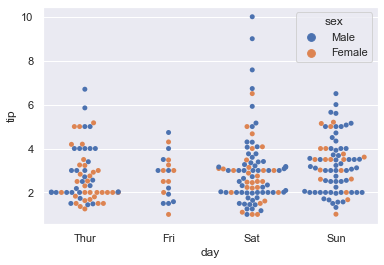

In [18]:
sns.swarmplot(x="day",y="tip",hue="sex",data=tips)

上面這個圖就很好的展示了不同性別在不同的星期中付小費數據的分布。

# #繪製盒圖、小提琴圖
seaborn.boxplot()
這個函數主要是繪製出一個箱型圖來反映離群點數據。

<AxesSubplot:xlabel='tip'>

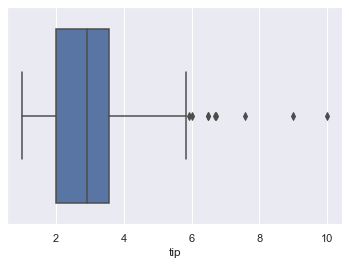

In [19]:
sns.boxplot(x="tip",data=tips)

<AxesSubplot:ylabel='tip'>

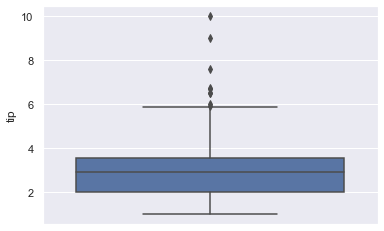

In [20]:
sns.boxplot(y="tip",data=tips)

<AxesSubplot:xlabel='day', ylabel='tip'>

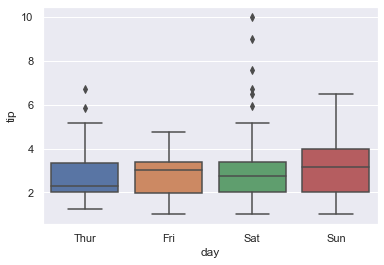

In [21]:
sns.boxplot(y="tip",x="day",data=tips)

seaborn庫中的很多繪圖方法就是提前給你畫好模板，我們只需要把數據傳進去就得到相應的圖形，
基於此，我門是不是可以在同一個模板上同時繪製分簇圖和箱型圖呢？

<AxesSubplot:xlabel='day', ylabel='total_bill'>

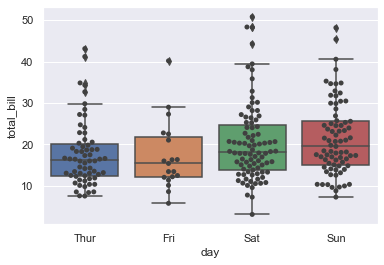

In [24]:
sns.boxplot(x="day",y="total_bill",data=tips)
sns.swarmplot(x="day",y="total_bill",data=tips,color="0.25")

<AxesSubplot:xlabel='day', ylabel='tip'>

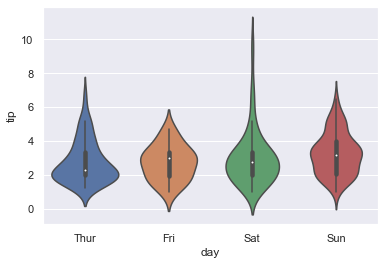

In [25]:
sns.violinplot(y="tip",x="day",data=tips)

小提琴圖即反映了數據的離群情況，同時也反映了數據的分布密度。<br>
此函數跟箱型圖一樣，也有hue參數，可以查看第二個分類屬性下的數據分布，如下：


<AxesSubplot:xlabel='day', ylabel='tip'>

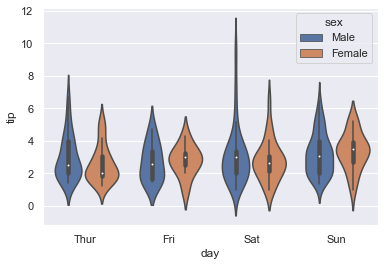

In [26]:
sns.violinplot(y="tip",x="day",hue="sex",data=tips)

可以看到，上面的小提琴圖是4對8個，即當設置hue參數為sex時，每個小提琴的數據集是一類數據，那有沒有辦法讓男性對應數據和女性對應數據都作為一個數據集繪製出一個小提琴圖，只是在一個圖中區分男性數據和女性數據呢？答案是肯定的，violinplot()函數提供了一個split參數，可以做到以上需求，如下：


<AxesSubplot:xlabel='day', ylabel='tip'>

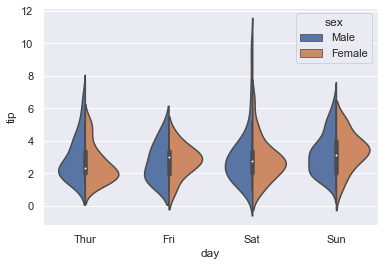

In [27]:
sns.violinplot(y="tip",x="day",hue="sex",data=tips,split=True)

除此以外，我們再來看一下inner參數，上面的小提琴圖中內部都是箱型圖，通過inner參數，我們可以設置其他類型，inner可選參數有：box、quartile(四分位)、point、stick。我們依次看下：


<AxesSubplot:xlabel='day', ylabel='tip'>

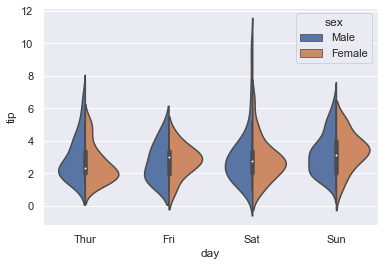

In [28]:
sns.violinplot(y="tip",x="day",hue="sex",data=tips,split=True)

<AxesSubplot:xlabel='day', ylabel='tip'>

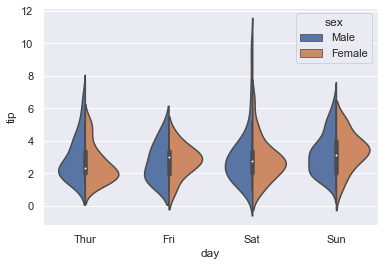

In [29]:
sns.violinplot(y="tip",x="day",hue="sex",data=tips,split=True)

<AxesSubplot:xlabel='day', ylabel='tip'>

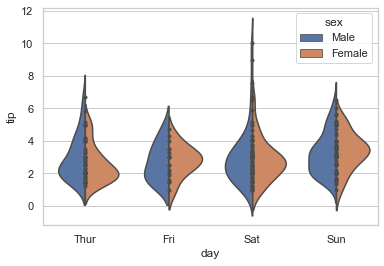

In [42]:
sns.violinplot(y="tip",x="day",hue="sex",data=tips,split=True,inner="box")

<AxesSubplot:xlabel='day', ylabel='tip'>

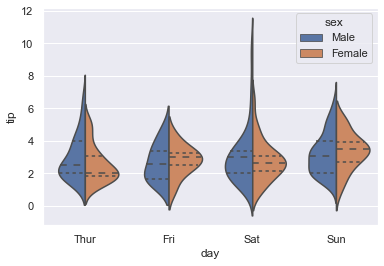

In [30]:
sns.violinplot(y="tip",x="day",hue="sex",data=tips,split=True,inner="quartile")

<AxesSubplot:xlabel='day', ylabel='tip'>

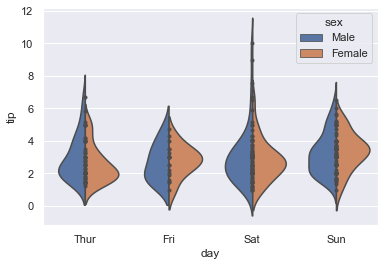

In [31]:
sns.violinplot(y="tip",x="day",hue="sex",data=tips,split=True,inner="point")

<AxesSubplot:xlabel='day', ylabel='tip'>

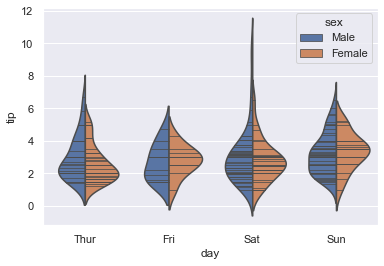

In [32]:
sns.violinplot(y="tip",x="day",hue="sex",data=tips,split=True,inner="stick")

# #結構化展示多維數據
***Visualizing the multidimensional relationships among the samples is as easy as calling sns.pairplot:***

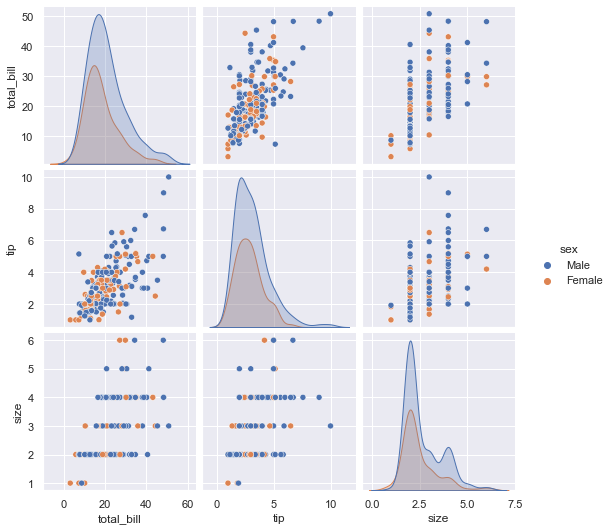

In [33]:
sns.pairplot(tips,hue="sex",height=2.5)

使用FacetGrid時，我們會通過一個pandas DataFrame以及控制圖形網格的行、列和顏色的變量名稱來初始化一個對象。這些維度變量（控制行、列和顏色的變量）應該是分類變量或者離散變量，然後這些變量的不同水平組合起來就構成了整個圖形的每一個子圖（facet，在這裡可以理解為我們維度拆解的最小粒度）


這一函數的目標是一步到位地提供一幅完整的成品圖，它在完成繪圖後還會對每個坐標軸添加注釋。

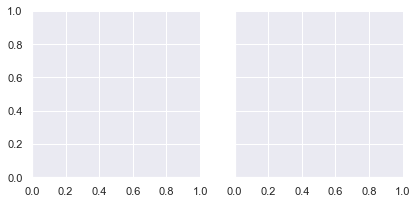

In [35]:
g=sns.FacetGrid(tips,col="time")

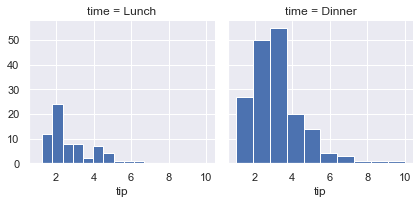

In [36]:
g.map(plt.hist,"tip")

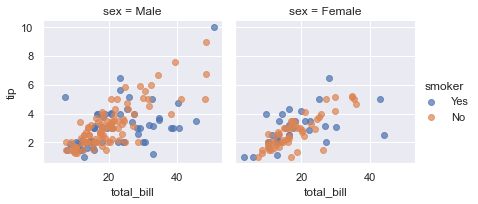

In [37]:
g=sns.FacetGrid(tips,col="sex",hue="smoker")
g.map(plt.scatter,"total_bill","tip",alpha=0.7)
g.add_legend()

我們可以指定某個seaborn調色板，也可以通過字典將hue變量中的每個分類與其對應的matplotlib顏色傳遞給函數<br>
（這樣就可以隨心所以使用大量的matplotlib支持的色彩）


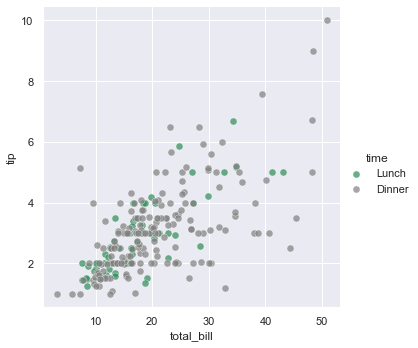

In [38]:
pal=dict(Lunch="seagreen",Dinner="gray")
g=sns.FacetGrid(tips,hue="time",palette=pal,height=5)
g.map(plt.scatter,"total_bill","tip",s=50,alpha=0.7,linewidth=0.5,edgecolor="white")
g.add_legend()

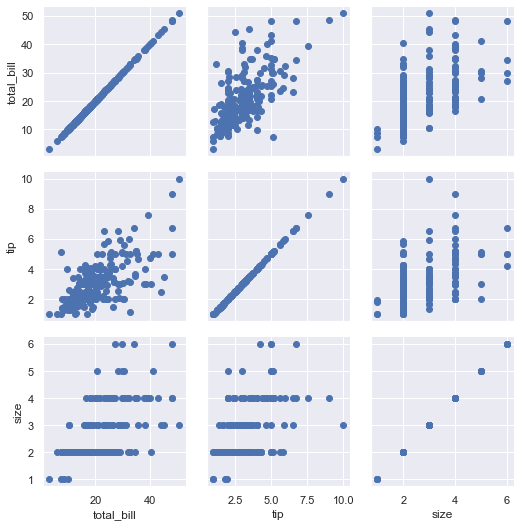

In [39]:
tips=sns.load_dataset("tips")
g=sns.PairGrid(tips)
g.map(plt.scatter)

map_diag()函數是繪製對角線上的單變量子圖，mag_offdiag是繪製對角線以外的兩個變量間的子圖。

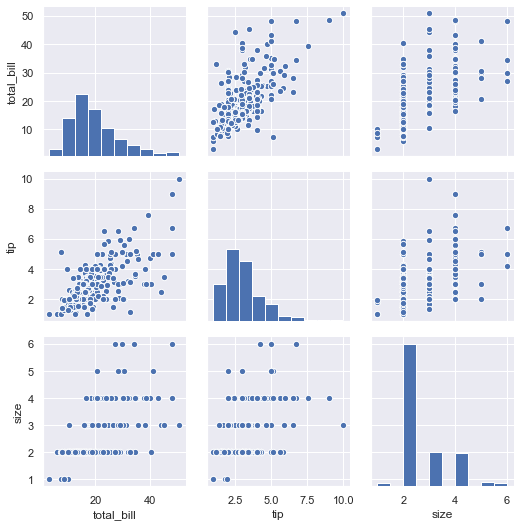

In [40]:
g=sns.PairGrid(tips)
g=g.map_diag(plt.hist,edgecolor="w")
g=g.map_offdiag(plt.scatter,edgecolor="w",s=40)

# [練習]試著讀取自己的資料，繪製出多維數據圖表

In [41]:
taxi=sns.load_dataset("taxis")

In [42]:
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


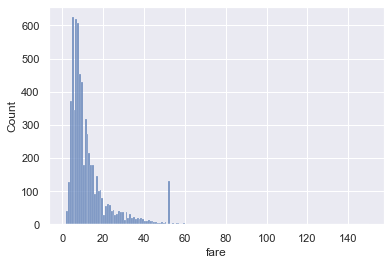

In [49]:
histChart=sns.histplot(x="fare",data=taxi)